In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
import scipy.constants as cnst
import scipy.optimize as opt
import emcee
import corner

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
#mpl.rcParams['axes.spines.right'] = False
#mpl.rcParams['axes.spines.top'] = False

$$
\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2 \, \frac{d\theta}{d\xi}\right) = -\theta^n
$$

$$
\begin{cases}
\displaystyle \frac{d\theta}{d\xi}=\omega \\[12pt]
\displaystyle \frac{d}{d\xi}\left(\xi^2 \omega\right)=-\xi^2 \, \theta^n
\quad \Rightarrow \quad \frac{d \omega}{d\xi} = -\theta^n - 2 \frac{\omega}{\xi}
\end{cases}
$$

$$
\frac{d}{d\xi} \left(\begin{matrix}
\theta \\
\omega
\end{matrix}\right) =
\left(\begin{matrix}
\omega \\
\displaystyle -\theta^n  - 2 \frac{\omega}{\xi}
\end{matrix}\right)
$$

$$
g_0 := \frac{\rho_0}{\rho_c} = \theta^n(\xi_0) \, , \qquad 
f_0 := \xi_0^2\frac{d\theta}{d\xi}(\xi_0) 
$$

In [2]:
INDEX = 3.5
NOMI = np.array(["indice", "csi", "theta", "theta_p", "g_0", "f_0"])
table = Table.read(f'build/Lane-Emden_Eulero_n={INDEX}.dat', names = NOMI,  format="ascii")
table

indice,csi,theta,theta_p,g_0,f_0
int64,float64,float64,float64,float64,float64
0,0.0001,1.0,0.0,1.0,0.0
1,0.0011,1.0,-0.001,1.0,-1.21e-09
2,0.0021,0.999999,-0.000181818,0.999997,-8.01818e-10
3,0.0031,0.999999,-0.00100865,0.999996,-9.69317e-09
4,0.0041,0.999998,-0.00135791,0.999992,-2.28264e-08
5,0.0051,0.999996,-0.0016955,0.999988,-4.41001e-08
6,0.0061,0.999995,-0.00203059,0.999982,-7.55582e-08
7,0.0071,0.999993,-0.0023648,0.999975,-1.1921e-07
8,0.0081,0.99999,-0.00269864,0.999966,-1.77058e-07


In [3]:
ORDINE = {nome: i for i,nome in enumerate(NOMI)}
data = np.array( [ table[nome] for nome in NOMI  ] ).T

In [4]:
indici = data[:, ORDINE["indice"] ]
csis = data[:, ORDINE["csi"] ]
thetas = data[:, ORDINE["theta"] ]
thetas_p = data[:, ORDINE["theta_p"] ]
g0s = data[:, ORDINE["g_0"] ]
f0s = data[:, ORDINE["f_0"] ]

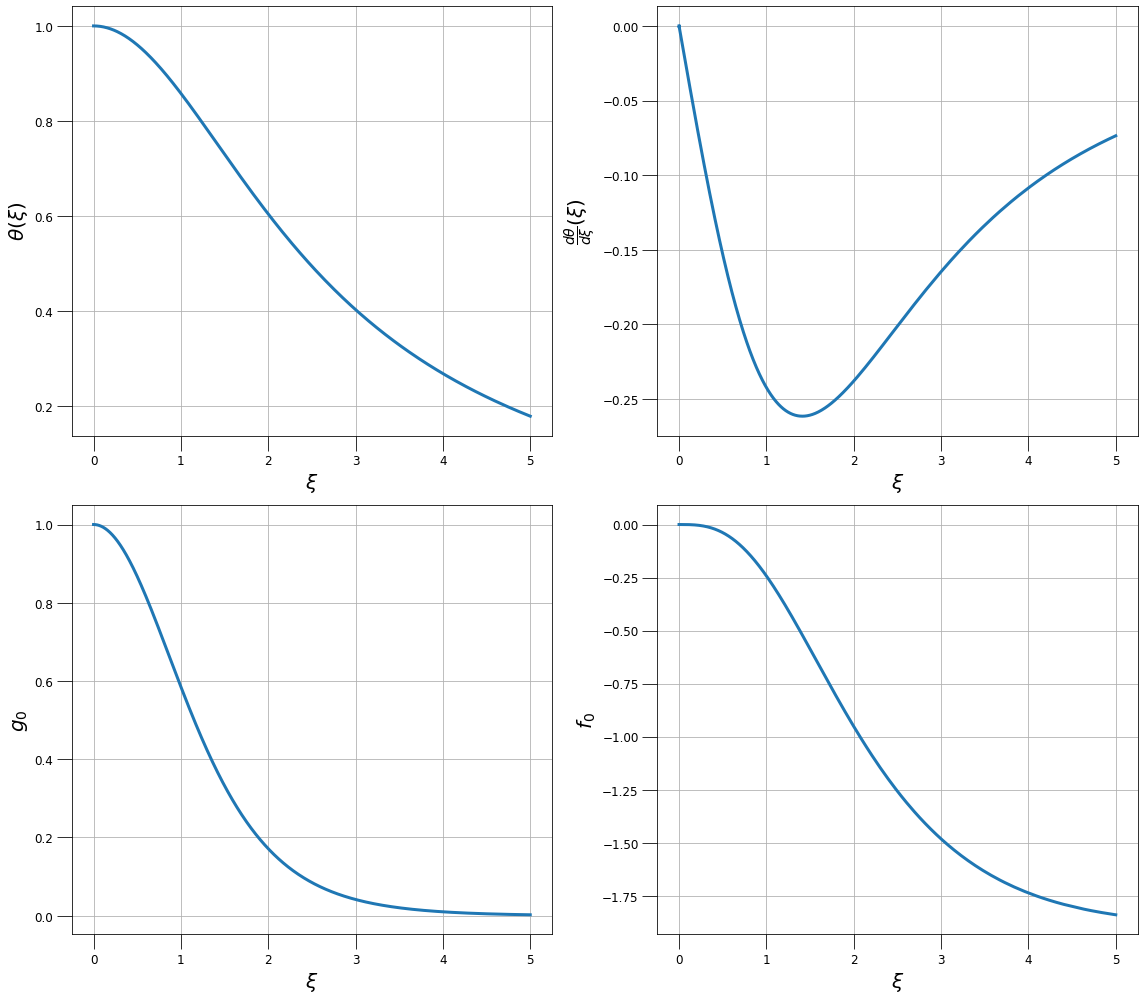

In [5]:
SIZE_ticks = 15
SIZE_labels = 20

fig, axs = plt.subplots(2, 2, figsize=(16, 14), tight_layout=True)
axs = axs.reshape(-1)

v_data = [thetas, thetas_p, g0s, f0s]
v_ynames = [r'$\theta(\xi)$', r'$\frac{d\theta}{d\xi}(\xi)$', r'$g_0$', r'$f_0$']

for i in range(len(v_data)):
    ax = axs[i]
    ax.plot(csis, v_data[i], '-', lw=3)
    ax.grid()
    #plt.xticks(np.arange(14,20,1), size=SIZE_2)
    #plt.yticks(np.arange(0,10,2), size=SIZE_2)
    ax.tick_params(axis='x', size=SIZE_ticks)
    ax.tick_params(axis='y', size=SIZE_ticks)
    ax.set_xlabel(r'$\xi$', size=SIZE_labels)
    ax.set_ylabel(v_ynames[i], size=SIZE_labels);

In [6]:
rho_norm = thetas**INDEX

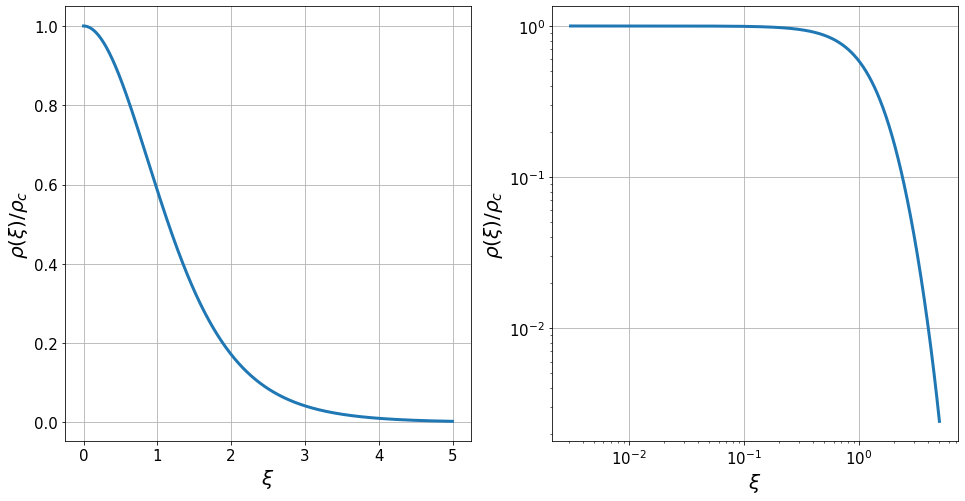

In [7]:
SIZE_ticks = 15
SIZE_labels = 20
Rows, Cols = 1, 2

fig = plt.figure(figsize = (16, 8))

plt.subplot(Rows, Cols, 1)
fig.subplots_adjust(wspace = 0.5, hspace = 0.2)
plt.plot(csis, rho_norm, '-', lw=3)
plt.grid()
#plt.xticks(np.arange(14,20,1), size=SIZE_2)
#plt.yticks(np.arange(0,10,2), size=SIZE_2)
plt.xticks(size=SIZE_ticks)
plt.yticks(size=SIZE_ticks)
plt.xlabel(r'$\xi$', size=SIZE_labels)
plt.ylabel(r'$\rho(\xi)/\rho_c$', size=SIZE_labels);



plt.subplot(Rows, Cols, 2)
fig.subplots_adjust(wspace = 0.2, hspace = 0.2)
firsts_N = 3
plt.plot(csis[firsts_N:], rho_norm[firsts_N:], '-', lw=3)
plt.grid()
#plt.xticks(np.arange(14,20,1))
#plt.yticks(np.arange(0,10,2))
plt.xticks(size=SIZE_ticks)
plt.yticks(size=SIZE_ticks)
plt.xlabel(r'$\xi$', size=SIZE_labels)
plt.ylabel(r'$\rho(\xi)/\rho_c$', size=SIZE_labels)
plt.xscale("log")
plt.yscale("log")

In [8]:
pressures_0 = np.array([f**2.0*g/4/np.pi for f,g in zip(f0s, g0s)])
volumes_0 = np.array([(csi/f)**3.0 for csi,f in zip(csis, f0s)])
pressures_0, volumes_0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


(array([0.00000000e+00, 1.16509376e-19, 5.11611663e-20, ...,
        6.50684813e-04, 6.49790157e-04, 6.48895381e-04]),
 array([            inf, -7.51314801e+17, -1.79651348e+19, ...,
        -2.00479011e+01, -2.00579764e+01, -2.00680544e+01]))

Text(0, 0.5, '$p_0/p_s$')

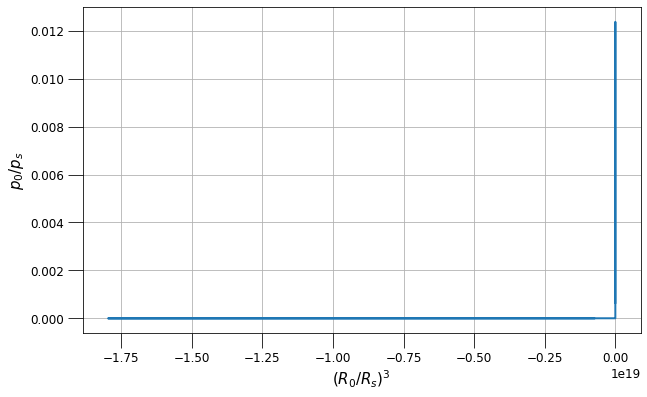

In [9]:
SIZE_ticks = 15
SIZE_labels = 15

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(volumes_0, pressures_0, '-', lw=2)
ax.grid()
#plt.xticks(np.arange(14,20,1), size=SIZE_2)
#plt.yticks(np.arange(0,10,2), size=SIZE_2)
ax.tick_params(axis='x', size=SIZE_ticks)
ax.tick_params(axis='y', size=SIZE_ticks)
ax.set_xlabel(r'$(R_0/R_s)^3$', size=SIZE_labels)
ax.set_ylabel(r'$p_0/p_s$', size=SIZE_labels)
#ax.set_xlim(0., 1);
#ax.set_ylim(0., 1)
#plt.xscale("log")
#plt.yscale("log");

In [10]:
max(pressures_0), np.argmax(pressures_0), pressures_0[np.argmax(pressures_0)]

(0.01236811259537164, 2036, 0.01236811259537164)

In [11]:
volumes_0[np.argmax(pressures_0)], volumes_0[np.argmax(pressures_0)]**0.333333

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


(-9.06819125998774, nan)

In [12]:
np.where(volumes_0>10)[0][-1]

0

In [13]:
ind_end = np.where(abs(volumes_0-0.6) < 0.01)[0][1]
ind_beg = np.where(volumes_0>10)[0][-1]

IndexError: index 1 is out of bounds for axis 0 with size 0

In [ ]:
plt.plot(volumes_0[ind_beg:ind_end], pressures_0[ind_beg:ind_end])

In [ ]:
initial_value = 0.6
ending_value = 10
def func(x, a, b, c, d, e, f):
    #return a + d/x**3.0
    return a + b/x + c/x**2.0 + d/x**3.0+ e/x**4.0

In [ ]:
ind_end = np.where(abs(volumes_0-initial_value) < 0.01)[0][1]
ind_beg = np.where(volumes_0>ending_value)[0][-1]
xdata = volumes_0[ind_beg:ind_end]
ydata = pressures_0[ind_beg:ind_end]
popt, pcov = opt.curve_fit(func, xdata, ydata)
popt

In [ ]:
SIZE_ticks = 15
SIZE_labels = 15

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(xdata, ydata, 'b-', lw=2, label="datas")
ax.plot(xdata, func(xdata, *popt), 'r--', lw=2, label="best fit")
ax.grid()
#plt.xticks(np.arange(14,20,1), size=SIZE_2)
#plt.yticks(np.arange(0,10,2), size=SIZE_2)
ax.tick_params(axis='x', size=SIZE_ticks)
ax.tick_params(axis='y', size=SIZE_ticks)
ax.set_xlabel(r'$(R_0/R_s)^3$', size=SIZE_labels)
ax.set_ylabel(r'$p_0/p_s$', size=SIZE_labels)
ax.set_xlim(initial_value, ending_value);
ax.legend();
#ax.set_ylim(0., 1)
#plt.xscale("log")
#plt.yscale("log");